# Image Processing in Python

This is an introductory tutorial on image processing using Python packages. We will do a code along to understand image data types, manipulate and prepare images for analysis such as image segmentation.

### In this tutorial, we will learn:
- to load images and extract basic statistics
- image data types
- image preprocessing and manipulation
- image segmentation

### Useful links
- [skimage](http://scikit-image.org/) Sklearn's image package
- [OpenCV](https://opencv.org/) Open Source Computer Vision library
- [mahotas](http://mahotas.readthedocs.io/en/latest/) Computer Vision in Python

In [1]:
# Packages used in this tutorial
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import skimage
from skimage import data

# Load images
### Load example image from skimage

In [2]:
camera = data.camera()
camera

array([[156, 157, 160, ..., 152, 152, 152],
       [156, 157, 159, ..., 152, 152, 152],
       [158, 157, 156, ..., 152, 152, 152],
       ...,
       [121, 123, 126, ..., 121, 113, 111],
       [121, 123, 126, ..., 121, 113, 111],
       [121, 123, 126, ..., 121, 113, 111]], dtype=uint8)

In [3]:
type(camera)

numpy.ndarray

In [4]:
camera.shape

(512, 512)

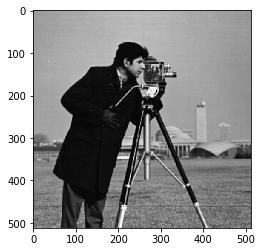

In [5]:
plt.imshow(camera, 'gray')

In [6]:
# Simple statistics
print('Image shape as array: %d x %d' % (camera.shape[0], camera.shape[1]))
print('Number of pixels in the image: %d' % camera.size)
print('Range of pixels: [%d, %d]' % (camera.min(), camera.max()))
print('Average pixel value: %.2f' % camera.mean())

Image shape as array: 512 x 512
Number of pixels in the image: 262144
Range of pixels: [0, 255]
Average pixel value: 118.31


### Load your own image

In [7]:
from skimage import io
colony = io.imread('yeast_colony_array.jpg')
print(type(colony))
print(colony.shape)

<class 'numpy.ndarray'>
(1059, 1571, 3)


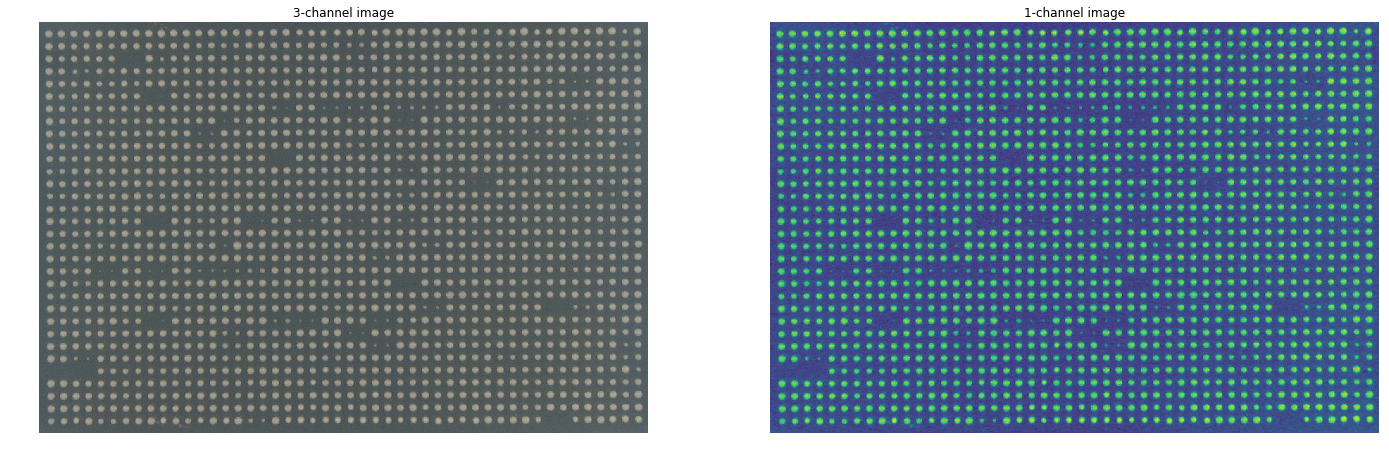

In [8]:
plt.figure(figsize=(24, 18))

# Plot all channels of a real image
plt.subplot(121)
plt.imshow(colony[:,:,:])
plt.title('3-channel image')
plt.axis('off')

# Plot one channel only
plt.subplot(122)
plt.imshow(colony[:,:,0])
plt.title('1-channel image')
plt.axis('off');

# Image manipulation

### Getting and setting pixel values

In [9]:
# Get the pixel value at row 10, column 10 on the 10th row and 20th column
camera = data.camera()
camera[10, 20]

153

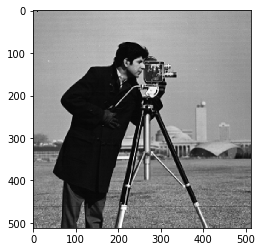

In [10]:
# Set the pixel at row 3, column 10 to black
camera[3, 10] = 0
plt.imshow(camera, 'gray')

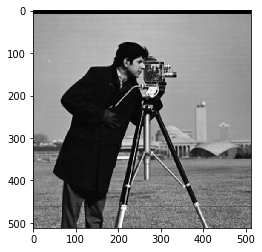

In [11]:
# Set the first ten lines to black
camera = data.camera()
camera[:10] = 0
plt.imshow(camera, 'gray')

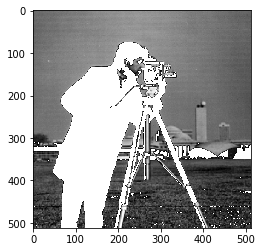

In [12]:
# Set to "white" (255) pixels where mask is True
camera = data.camera()
mask = camera < 87
camera[mask] = 255
plt.imshow(camera, 'gray')

<class 'numpy.ndarray'>
(300, 451, 3)


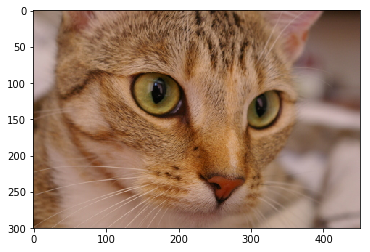

In [13]:
# Change the color for real images
cat = data.chelsea()
print(type(cat))
print(cat.shape)
plt.imshow(cat)

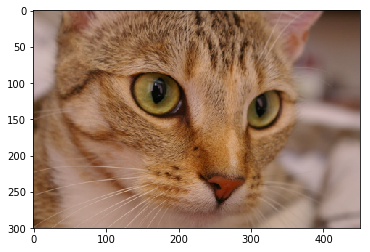

In [14]:
# Set the pixel at row 50, column 61 to green
# [red, green, blue]
cat[50, 61] = [0, 255, 0]
plt.imshow(cat)

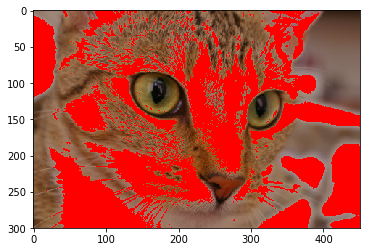

In [15]:
# Set brighter pixels to red
cat = data.chelsea()
red_cat = cat.copy()

reddish = cat[:, :, 0] > 160
red_cat[reddish] = [255, 0, 0]
plt.imshow(red_cat)

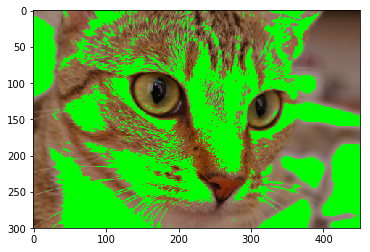

In [16]:
# Set brighter pixels to green
cat = data.chelsea()
green_cat = cat.copy()

greenish = cat[:, :, 0] > 160
green_cat[greenish] = [0, 255, 0]
plt.imshow(green_cat)

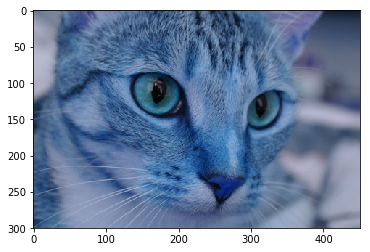

In [17]:
# Change RGB color to BGR for openCV
cat = data.chelsea()
BGR_cat = cat[:, :, ::-1]
plt.imshow(BGR_cat)

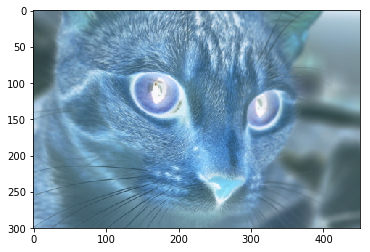

In [18]:
# Invert (or complement) an image
from skimage import util
inverted_cat = util.invert(cat)
plt.imshow(inverted_cat)

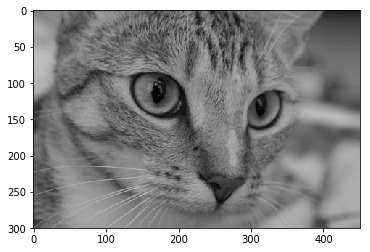

In [19]:
# Convert to gray image
from skimage.color import rgb2gray, gray2rgb
gray_cat = rgb2gray(cat)
new_cat = gray2rgb(gray_cat)
plt.imshow(gray_cat)
plt.imshow(gray_cat, 'gray')
plt.imshow(new_cat)

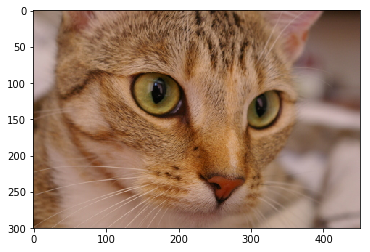

In [20]:
# Original image
plt.imshow(cat)

### Converting image dtype

* Function Name  Description
* img_as_float   Convert to 64-bit floating point.
* img_as_ubyte   Convert to 8-bit uint.
* img_as_uint    Convert to 16-bit uint.
* img_as_int     Convert to 16-bit int.

In [21]:
from skimage import img_as_float, img_as_ubyte
float_cat = img_as_float(cat)
uint_cat = img_as_ubyte(float_cat)

/usr/local/lib/python3.5/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


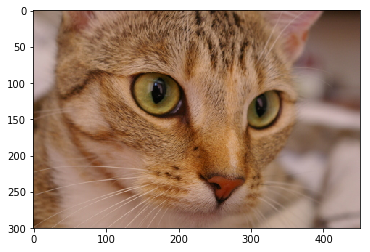

In [22]:
plt.imshow(uint_cat)

### Rescale intensity

In [23]:
from skimage import exposure
rescaled_cat = exposure.rescale_intensity(cat, in_range='uint8')
print(cat.min(), cat.max())
print(rescaled_cat.min(), rescaled_cat.max())

0 231
0 231


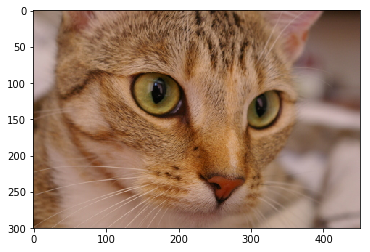

In [24]:
plt.imshow(rescaled_cat)

In [25]:
rescaled_cat = exposure.rescale_intensity(cat, in_range='uint10')
print(cat.min(), cat.max())
print(rescaled_cat.min(), rescaled_cat.max())

0 231
0 57


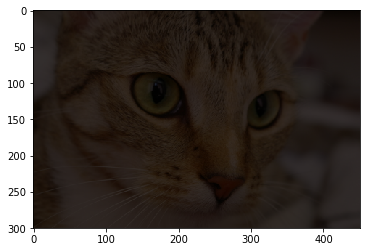

In [26]:
plt.imshow(rescaled_cat)

### Display image histograms

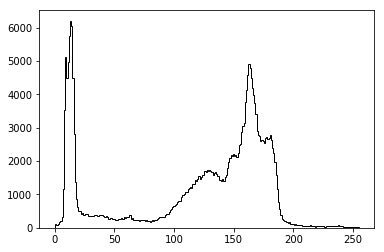

In [27]:
img = data.camera()
plt.hist(img.ravel(), bins=256, histtype='step', color='black');

# Image Segmentation

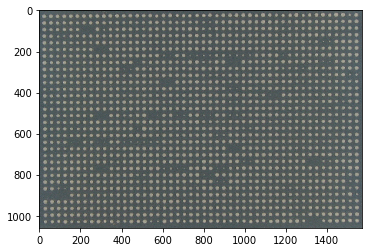

In [28]:
# Use colony image for segmentation
colony = io.imread('yeast_colony_array.jpg')
plt.imshow(colony)

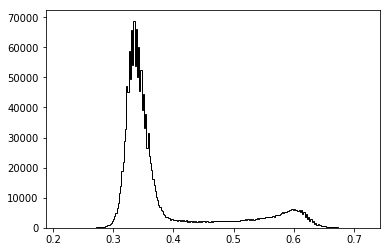

In [29]:
# Plot histogram
img = rgb2gray(colony)
plt.hist(img.ravel(), bins=256, histtype='step', color='black');

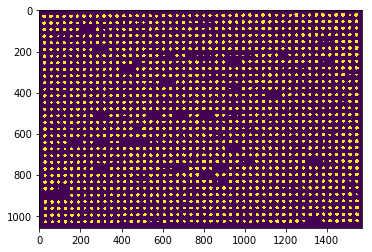

In [30]:
# Use thresholding
plt.imshow(img > 0.5)

### Canny edge detector

In [31]:
from skimage.feature import canny
from scipy import ndimage as ndi
img_edges = canny(img)
img_filled = ndi.binary_fill_holes(img_edges)

/usr/local/lib/python3.5/dist-packages/scipy/ndimage/measurements.py:431: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  safe = ((np.issubdtype(dt, int) and dt.itemsize <= int_size) or


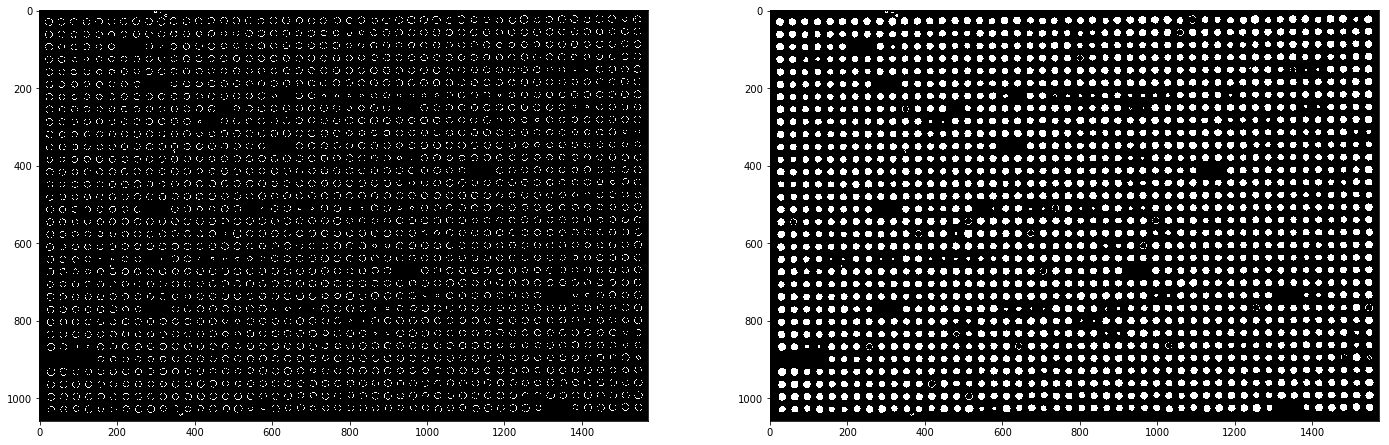

In [32]:
# Plot
plt.figure(figsize=(24, 18))
plt.subplot(121)
plt.imshow(img_edges, 'gray')
plt.subplot(122)
plt.imshow(img_filled, 'gray')

In [33]:
# Canny edge detector on cat
img_edges_cat = canny(cat[:,:,0]/255.)
img_filled_cat = ndi.binary_fill_holes(img_edges_cat)

/usr/local/lib/python3.5/dist-packages/scipy/ndimage/measurements.py:431: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  safe = ((np.issubdtype(dt, int) and dt.itemsize <= int_size) or


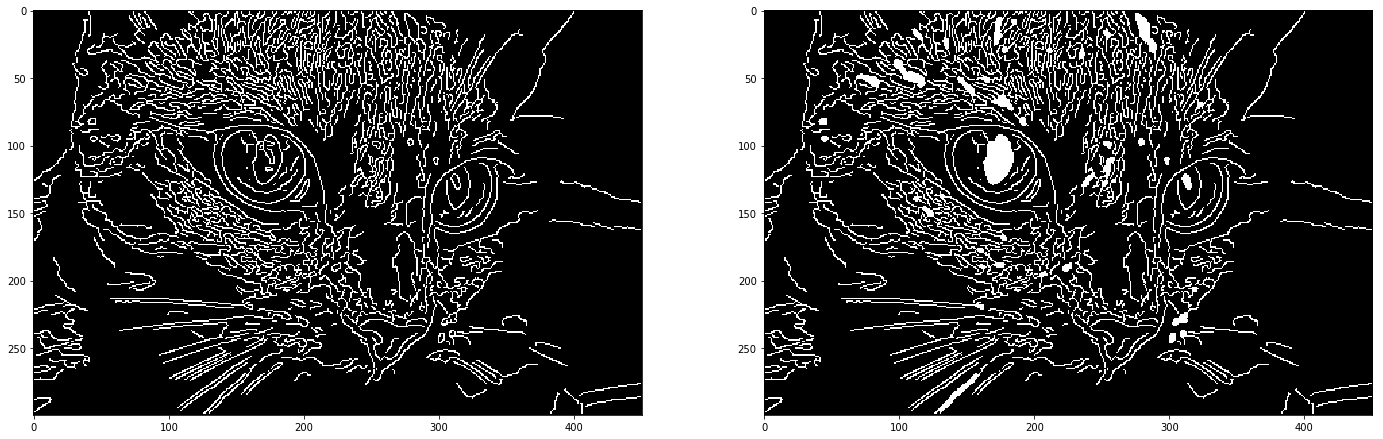

In [34]:
# Plot
plt.figure(figsize=(24, 18))
plt.subplot(121)
plt.imshow(img_edges_cat, 'gray')
plt.subplot(122)
plt.imshow(img_filled_cat, 'gray')

### Watershed algorithm

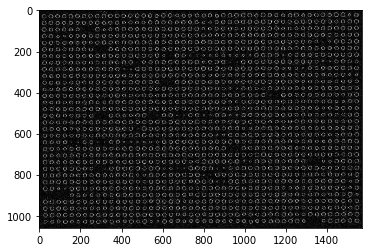

In [35]:
from skimage.filters import sobel
from skimage.morphology import watershed
# Elevation map
elevation_map = sobel(img)
plt.imshow(elevation_map, 'gray')

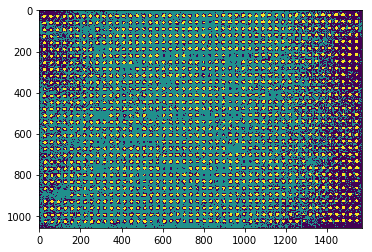

In [36]:
# Separate pixels into 3 classes
markers = np.zeros_like(img)
markers[img < 0.35] = 1
markers[img > 0.55] = 2
plt.imshow(markers)

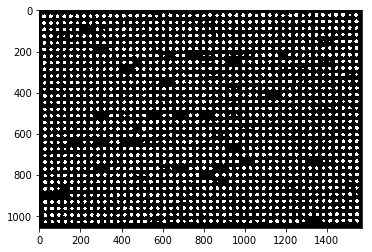

In [37]:
# Image segmentation using watershed transform
segmentation = watershed(elevation_map, markers)
# Set background pixels to 0
segmentation[segmentation == 1] = 0
plt.imshow(segmentation, 'gray')

1481


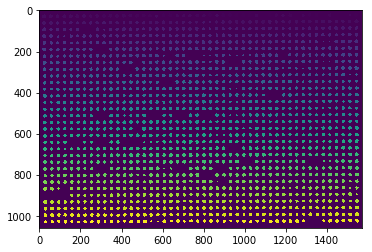

In [38]:
# Label segmented objects
labeled_colony, number = ndi.label(segmentation)
print(number) # 36*48 = 1536
plt.imshow(labeled_colony)

# [Display image histograms and change contrast tutorial](http://scikit-image.org/docs/stable/auto_examples/color_exposure/plot_equalize.html#sphx-glr-auto-examples-color-exposure-plot-equalize-py)

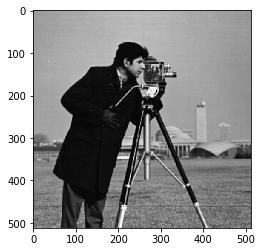

In [39]:
# Load an example image
img = data.camera()
plt.imshow(img, 'gray')

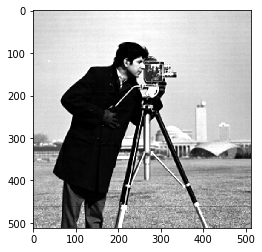

In [40]:
# Contrast stretching
p2, p98 = np.percentile(img, (2, 98))
img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))
plt.imshow(img_rescale, 'gray')

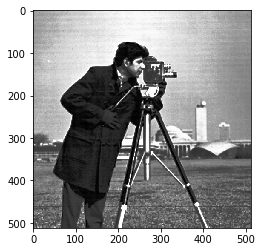

In [41]:
# Equalization
img_eq = exposure.equalize_hist(img)
plt.imshow(img_eq, 'gray')

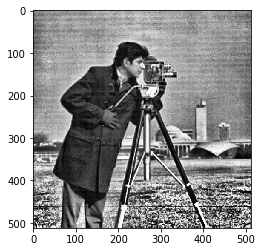

In [42]:
# Adaptive Equalization
img_adapteq = exposure.equalize_adapthist(img, clip_limit=0.03)
plt.imshow(img_adapteq, 'gray')

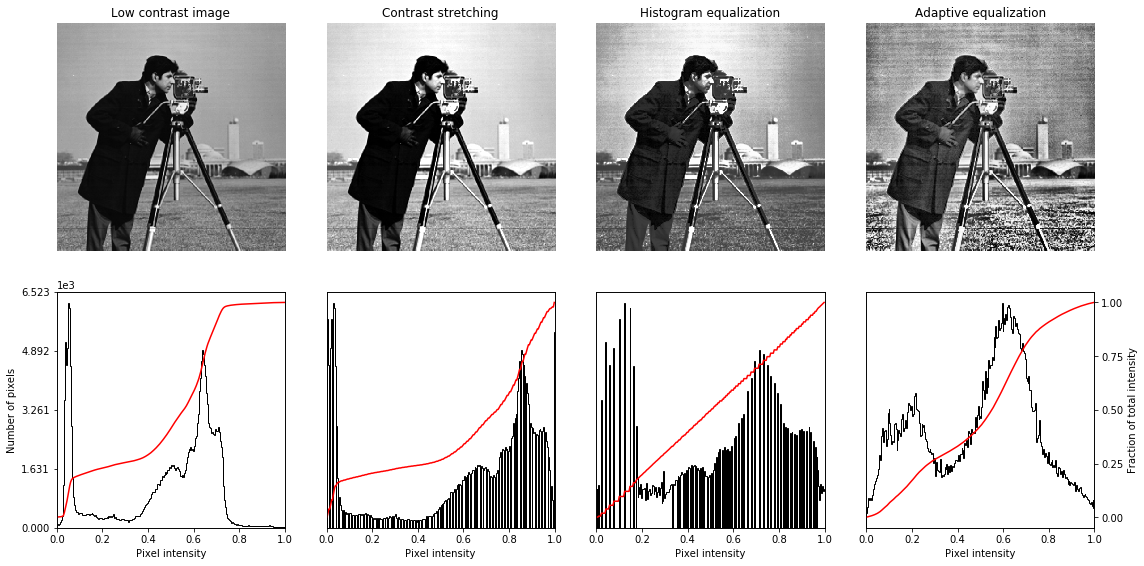

In [43]:
# Display results
def plot_img_and_hist(img, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram.

    """
    img = img_as_float(img)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(img, cmap=plt.cm.gray)
    ax_img.set_axis_off()
    ax_img.set_adjustable('box-forced')

    # Display histogram
    ax_hist.hist(img.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(img, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])

    return ax_img, ax_hist, ax_cdf

fig = plt.figure(figsize=(16, 8))
axes = np.zeros((2, 4), dtype=np.object)
axes[0, 0] = fig.add_subplot(2, 4, 1)
for i in range(1, 4):
    axes[0, i] = fig.add_subplot(2, 4, 1+i, sharex=axes[0,0], sharey=axes[0,0])
for i in range(0, 4):
    axes[1, i] = fig.add_subplot(2, 4, 5+i)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('Low contrast image')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_rescale, axes[:, 1])
ax_img.set_title('Contrast stretching')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_eq, axes[:, 2])
ax_img.set_title('Histogram equalization')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_adapteq, axes[:, 3])
ax_img.set_title('Adaptive equalization')

ax_cdf.set_ylabel('Fraction of total intensity')
ax_cdf.set_yticks(np.linspace(0, 1, 5))

fig.tight_layout()
plt.show()